# Section: KNN

## <font color='#4073FF'>Project: Customer Classification</font>

### <font color='#14AAF5'>Predicting the class to which a customer belongs on the basis of data provided.</font>  

### Project Brief:

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. This project focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

### 1. Dataset



The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:

- Basic Service
- E-Service
- Plus Service
- Total Service

**The dataset has following columns-**

- Region 	: Region code to the area where customers belong.
- Tenure	: Their span of choosing the company.
- Age	    : Age of the customers.
- Income	: Their average annual salaries (in 1000s)
- Marital	: Their Martial Status(1 - Married, 0 - Not Married)
- Address	: Address Zone
- Ed	    : Education Group (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown)
- Employ	: Employment Years
- Retire	: Retirement Status (1 - Not Retired, 0 - Retired)
- Gender	: Their Gender (1 - Male, 0 - Female)
- Reside	: Area Code where they live
- Custcat	: Customer Category (Target Variable)


- Region values - 1,2,3
- Address code Values - 1 through 48.
- Reside values - 0 through 7


Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### 2.  Data collection and exploration

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [3]:
# Shape of data
df.shape

(1000, 12)

In [4]:
# Checking information on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   marital  1000 non-null   int64
 4   address  1000 non-null   int64
 5   income   1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
 11  custcat  1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [5]:
# Descriptive statitics
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### 3. Data Cleaning

In [6]:
# no duplicates found
df.duplicated().sum()

0

In [7]:
# Checking missing values
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

### 4. Data Visualization

In [8]:
# Counts in each category
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

In [9]:
# Counts in each category
df['gender'].value_counts()

1    517
0    483
Name: gender, dtype: int64

<AxesSubplot:xlabel='custcat', ylabel='count'>

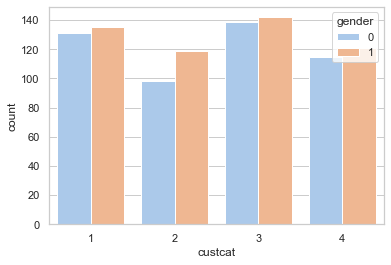

In [10]:
# Distribution of categories of customers by gender
plt.figure(figsize=(6,4))
sns.countplot(x='custcat',hue='gender',data=df,alpha=1,palette=sns.color_palette("pastel"))

<AxesSubplot:xlabel='ed', ylabel='count'>

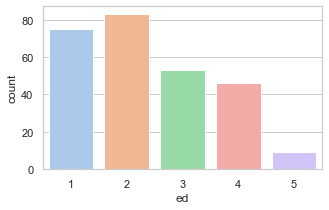

In [11]:
# Plotting educational level counts for category 1 customers.
plt.figure(figsize=(5,3))
sns.countplot(x=df[df['custcat']==1]['ed'],palette=sns.color_palette("pastel"))

<AxesSubplot:xlabel='ed', ylabel='count'>

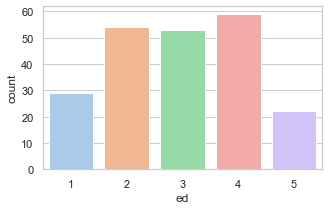

In [12]:
# Plotting educational level counts for category 2 customers.
plt.figure(figsize=(5,3))
sns.countplot(x=df[df['custcat']==2]['ed'],palette=sns.color_palette("pastel"))

<AxesSubplot:xlabel='ed', ylabel='count'>

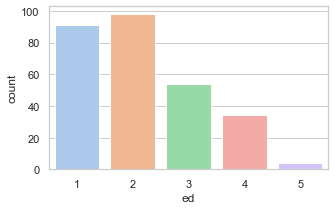

In [13]:
# Plotting educational level counts for category 3 customers.
plt.figure(figsize=(5,3))
sns.countplot(x=df[df['custcat']==3]['ed'],palette=sns.color_palette("pastel"))

<AxesSubplot:xlabel='ed', ylabel='count'>

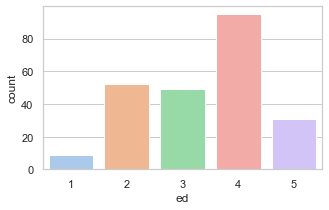

In [14]:
# Plotting educational level counts for category 4 customers.
plt.figure(figsize=(5,3))
sns.countplot(x=df[df['custcat']==4]['ed'],palette=sns.color_palette("pastel"))

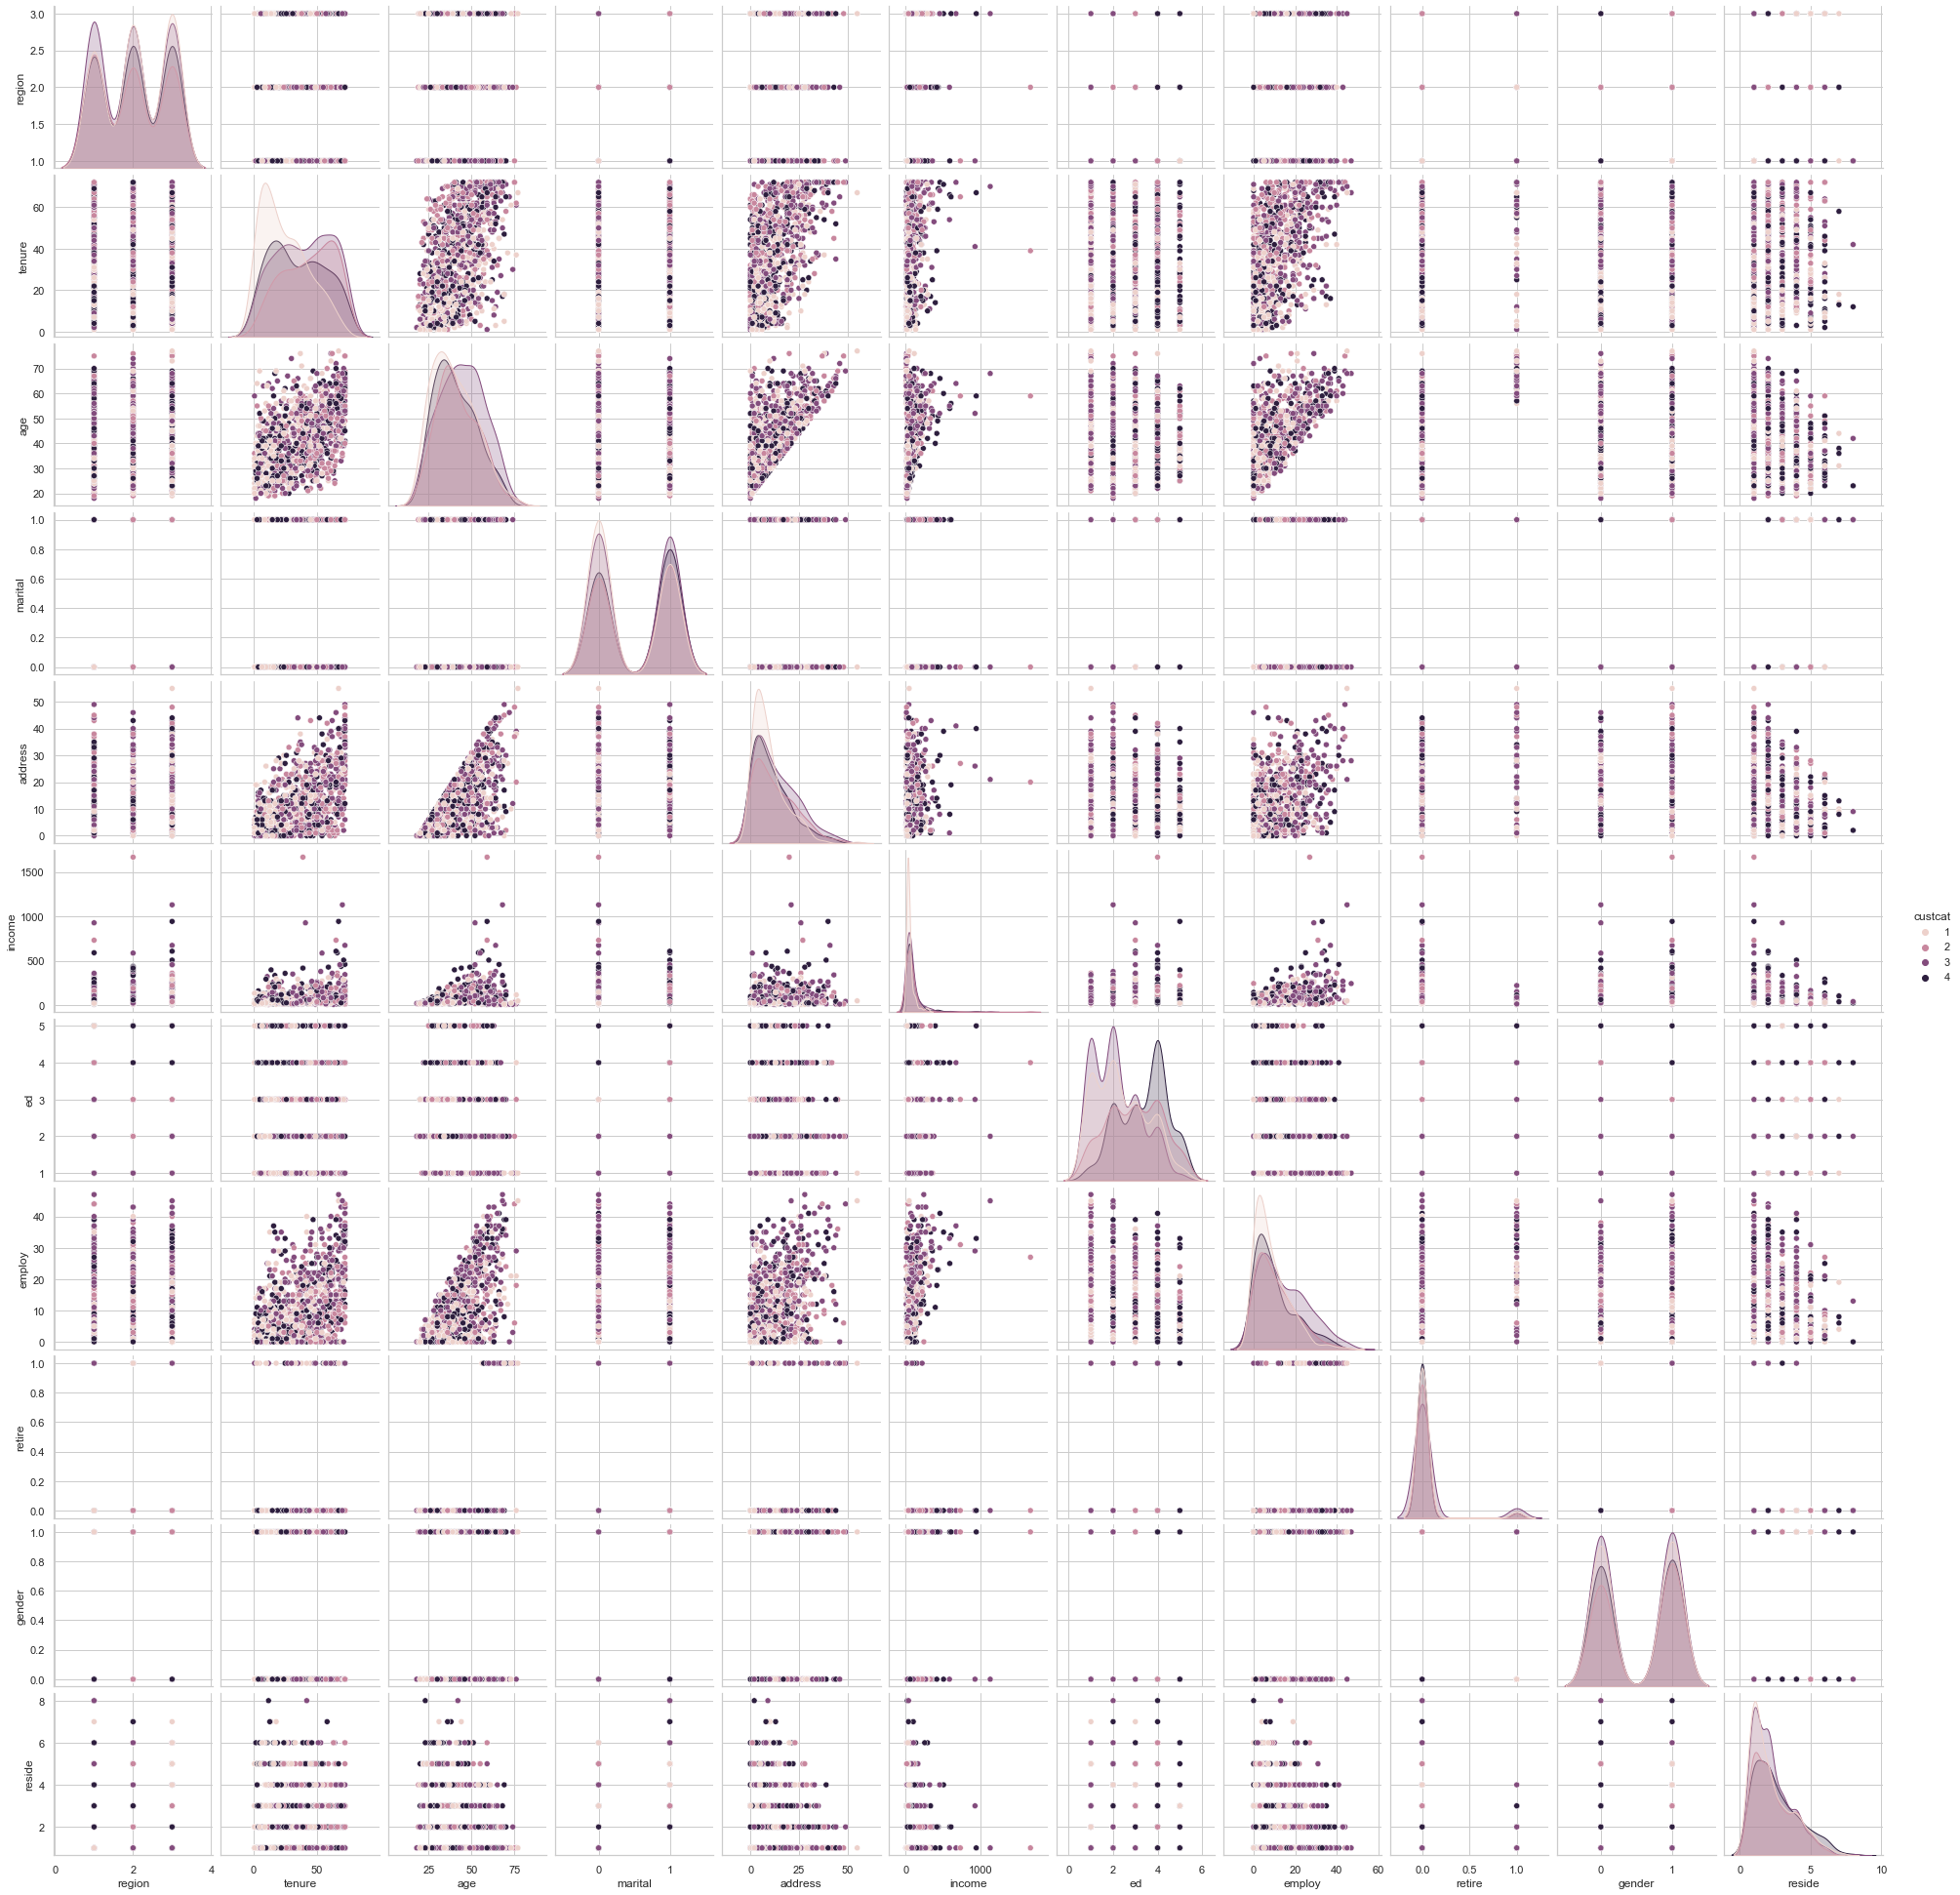

In [15]:
# Pairplot between all features
sns.pairplot(data=df,hue='custcat')
plt.show()

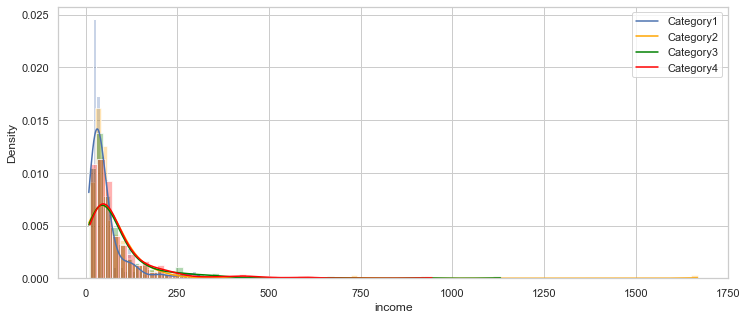

In [16]:
# numeric v/s categorical - probability density distribution -- distplot

# income v/s classes
plt.figure(figsize=(12,5))
sns.histplot(df['income'][df['custcat']==1],kde=True,stat='density',alpha=0.3)
sns.histplot(df['income'][df['custcat']==2],kde=True,stat='density',color='orange',alpha=0.3)
sns.histplot(df['income'][df['custcat']==3],kde=True,stat='density',color='green',alpha=0.3)
sns.histplot(df['income'][df['custcat']==4],kde=True,stat='density',color='red',alpha=0.3)
plt.legend(['Category1','Category2','Category3','Category4'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

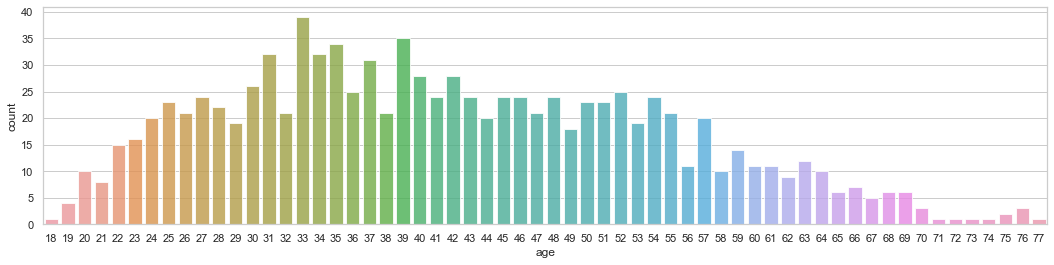

In [17]:
plt.figure(figsize=(18,4))
sns.countplot(x=df['age'],alpha=0.8)

Observations-

- 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers
- We have almost balanced data from different regions.
- There are more number of male customers as compared to females.
- For customers in category 1 and 3, majority have education level of university.
- For customers in category 2 and 4, majority have others in education field.
- The histogram for income is very skewed to the left with most of the incomes in range 0-250 thousands.

### 5. Correlation Analysis

    if corr(x,y) is between -0.1 to +0.1 = bad correlation

    if corr(x,y) is between +0.1 to +0.5 = good correlation
    
    if corr(x,y) is between -0.1 to -0.5 = good correlation

    if corr(x,y) > +0.5 = Very good correlation
    
    if corr(x,y) < -0.5 = Very good correlation

In [18]:
# Create correlation matrix


# write your code here




Age is strongly correlated with employ and address. Similarly marital status is correlated with reside area. Other good but not too strong, correlations are between income-employ,tenure-address and tenure-employ. 

### 6. Predictive Modelling - Telecom Company

#### **Methodology – K Nearest Neighbors** 

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. It stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.This algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.


It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.


#### Standardizing Features

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases.

In [19]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

y=df['custcat']

# Standardize X


# write your code here



In [20]:
X.shape

(1000, 11)

In [21]:
y.shape

(1000,)

#### Train test split

In [22]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# write your code here


In [23]:
# Print shapes of training and test sets



# write your code here




#### Parameters tuning using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn

# Define parameters
grid_params = { 'n_neighbors' : [3,4,5,6,7,8,9,10,11,12,13],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# Instantiate GridSearchCV
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [25]:
# Fit gs with training set


#write your code here



In [26]:
# Find the best score


#write your code here



In [27]:
# store best parameters into a variable


#write your code here



### 7. Model Fitting

In [28]:
# use the best hyperparameters, KNN model fitting


#write your code here



### 8. Model Evaluation

#### Performing 5 fold cross validation

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# 5-fold cross-validation 


#write your code here



In [30]:
# Evaluation metrics - Accuracy and classification report


#write your code here



We could not get a great accuracy on this dataset. There can be many reasons to it. KNN is a lazy learner and the dataset we used may not be large enough. Thus, one should try other classification algorithms such as SVMs or RandomForests to achieve better performance.

### 9. Export the model for deployment

In [32]:
# Export model


#write your code here
